# Visualizations


### EDA Focuses

**Comparison of TOF and Hansen**
- Compare TOF and Hansen tree cover estimates for each ESA and IPCC land cover class. Which land cover classes have the highest mean tree cover according to TOF and Hansen? Which have the highest number of hectares?
- What is the average and total difference between TOF and Hansen tree cover estimates?
- What do the differences in tree cover look like at 40-60% thresholds? Can remote sensing products enable more accurate reads at this threshold?

**Tree Cover by Land Cover Class**
- What are the most popular land cover classes?
- What does the distribution look like across all land cover classes? What does tree cover look like in cropland and urban areas?
- Which cities (urban land cover class) have the highest % tree cover?
- Within the Agriculture class, what does tree cover look like at each 10% bin?

**Not Explored yet**
- Does Hansen overestimate canopy cover at the 10% threshold?
- Aggregate total ha per landcover class for an entire country.
- What is the fractional percentage of ag or urban area that meets the forest land cover definition? 
- Will update with GGW questions.


**On hold/moved to old**
- What does tree cover look like in ESA's "No Data" class?


**statistics01.csv**: compares TOF and Hansen tree cover estimates for each admin boundary. Contains the mean tree cover estimate for the admin and the number of hectares of trees that fall into 20% tree cover bins.  
**statistics02.csv**: compares TOF and Hansen tree cover estimates for each land cover class in an admin boundary. Contains the mean tree cover estimate for the land cover class and the number of hectares of trees that fall ABOVE a certain threshold. Maps ESA land cover classes to IPCC categories.  
**statistics03.csv**: compares TOF and Hansen tree cover estimates for each land cover class in an admin boundary. Contains the mean tree cover estimate for the land cover class and the number of hectares of trees that fall BETWEEN certain thresholds. Maps ESA land cover classes to IPCC categories.

In [2]:
import os
import rasterio as rs
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd 
import pandas as pd

In [2]:
cr = pd.read_csv('Costa Rica/stats/Costa Rica_statistics01.csv')
cr_above = pd.read_csv('Costa Rica/stats/Costa Rica_statistics02.csv')
cr_btw = pd.read_csv('Costa Rica/stats/Costa Rica_statistics03.csv')

In [4]:
es = pd.read_csv('El Salvador/stats/El Salvador_statistics01.csv')
es_above = pd.read_csv('El Salvador/stats/El Salvador_statistics02.csv')
es_btw = pd.read_csv('El Salvador/stats/El Salvador_statistics03.csv')


es_above_new = pd.read_csv('El Salvador/stats/El Salvador_statistics02_new.csv')
es_btw_new = pd.read_csv('El Salvador/stats/El Salvador_statistics03_new.csv')

In [4]:
be = pd.read_csv('Belize/stats/Belize_statistics01.csv')
be_above = pd.read_csv('Belize/stats/Belize_statistics02.csv')
be_btw = pd.read_csv('Belize/stats/Belize_statistics03.csv')

In [2]:
gua = pd.read_csv('Guatemala/stats/Guatemala_statistics01.csv')
gua_above = pd.read_csv('Guatemala/stats/Guatemala_statistics02.csv')
gua_btw = pd.read_csv('Guatemala/stats/Guatemala_statistics03.csv')

In [6]:
pan = pd.read_csv('Panama/stats/Panama_statistics01.csv')
pan_above = pd.read_csv('Panama/stats/Panama_statistics02.csv')
pan_btw = pd.read_csv('Panama/stats/Panama_statistics03.csv')

In [7]:
nic = pd.read_csv('Nicaragua/stats/Nicaragua_statistics01.csv')
nic_above = pd.read_csv('Nicaragua/stats/Nicaragua_statistics02.csv')
nic_btw = pd.read_csv('Nicaragua/stats/Nicaragua_statistics03.csv')

In [8]:
hon = pd.read_csv('Honduras/stats/Honduras_statistics01.csv')
hon_above = pd.read_csv('Honduras/stats/Honduras_statistics02.csv')
hon_btw = pd.read_csv('Honduras/stats/Honduras_statistics03.csv')

# TOF vs Hansen

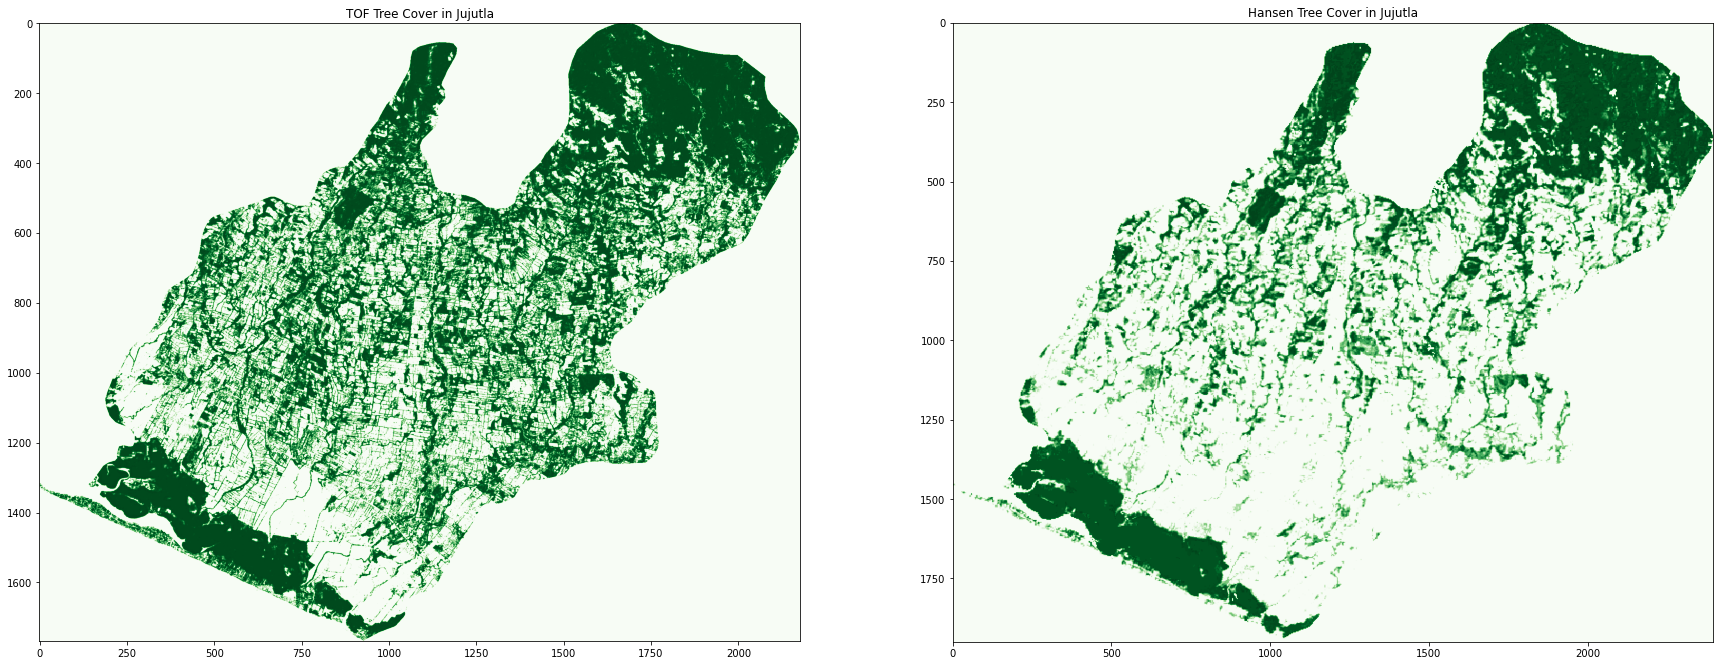

In [4]:
# El Salvador
jujutla_tof = rs.open('El Salvador/resampled_rasters/tof/Jujutla.tif').read(1)
jujutla_han = rs.open('El Salvador/resampled_rasters/hansen/Jujutla.tif').read(1)

plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.imshow(jujutla_tof, cmap='Greens', vmin=0, vmax=100)
plt.title('TOF Tree Cover in Jujutla')

plt.subplot(1,2,2)
plt.imshow(jujutla_han, cmap='Greens', vmin=0, vmax=100)
plt.title('Hansen Tree Cover in Jujutla')


plt.tight_layout;

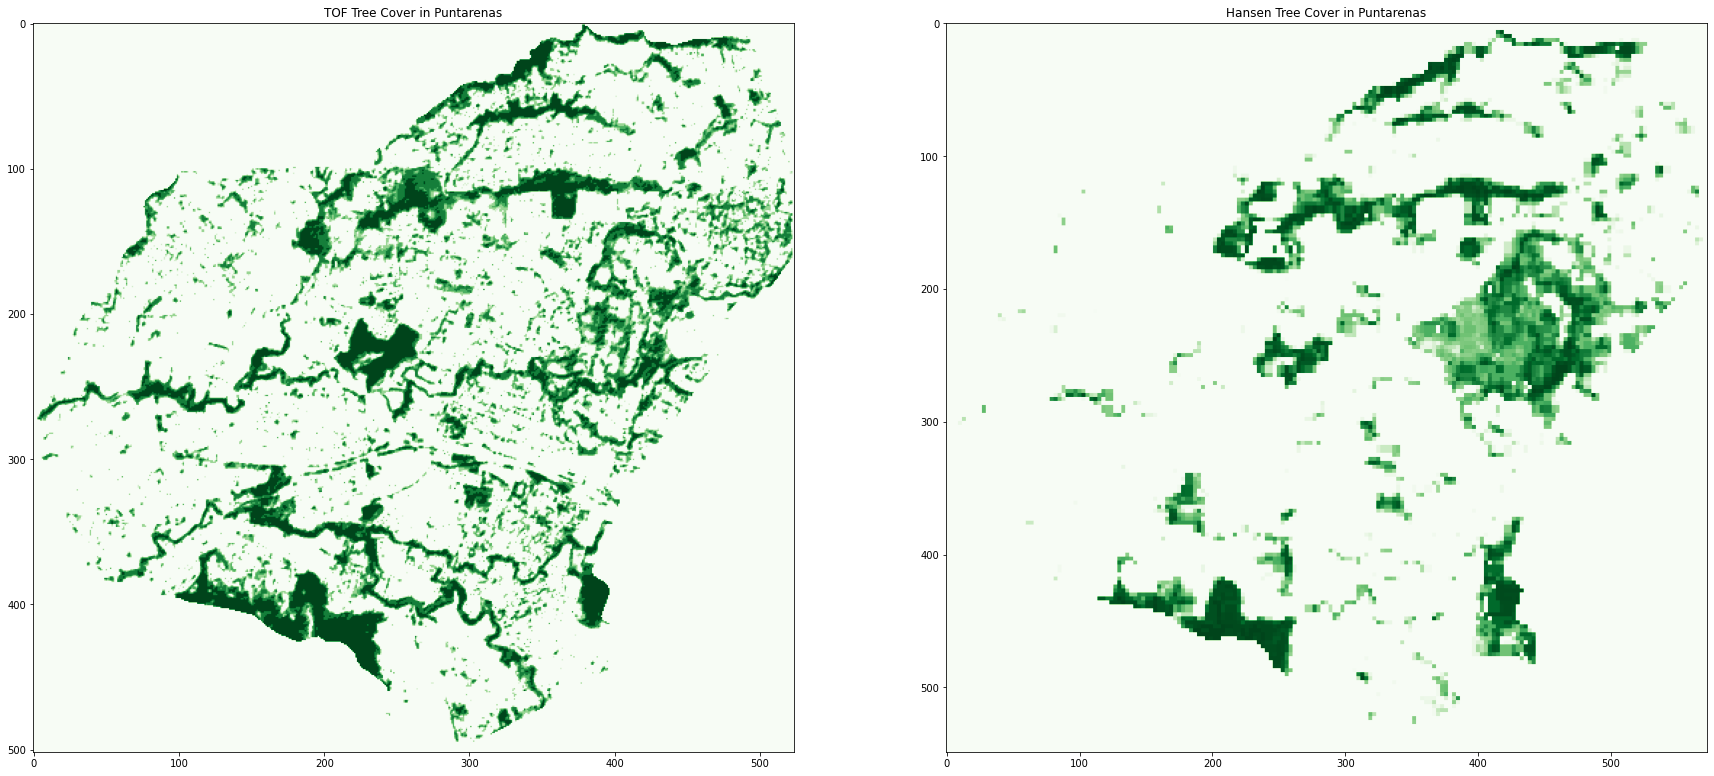

In [8]:
# Costa Rica
currid_tof = rs.open('Costa Rica/resampled_rasters/tof/Curridabat.tif').read(1)
currid_han = rs.open('Costa Rica/resampled_rasters/hansen/Curridabat.tif').read(1)

plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.imshow(currid_tof, cmap='Greens', vmin=0, vmax=100)
plt.title('TOF Tree Cover in Puntarenas')

plt.subplot(1,2,2)
plt.imshow(currid_han, cmap='Greens', vmin=0, vmax=100)
plt.title('Hansen Tree Cover in Puntarenas')


plt.tight_layout;

In [8]:
# check esa rasters for Corozal, Belize
plt.figure(figsize=(30,20))

corozal_esa = rs.open('Belize/resampled_rasters/esa/Corozal.tif').read(1)
plt.imshow(corozal_esa, cmap='Paired', vmin=0, vmax=100)
plt.set_title('Land Cover Classes in Corozal, Belize');

### Average % tree cover per admin
The vertical grouped bar charts compare Hansen (red) and TOF (blue) mean tree cover estimates per admin 1 boundary for a given country. This will give us a general comparison, indicate errors if we see zero tree cover, and illustrates the need to mosaic Hansen and TOF data together at some point.

In [4]:
def v_groupedbar_mean(bar_tof, bar_han, figsize, barwidth, labels, title):
    
    '''
    Plots a vertical grouped bar chart comparing Hansen (red) and TOF (blue) 
    mean tree cover estimates per admin 1 boundary for a given country. 
    '''
    
    #xlabels = labels
    x = np.arange(len(labels))  
    width = barwidth  

    plt.figure(figsize=figsize)
    plt.bar(x - width/2, bar_tof, width, label='TOF', color='navy', edgecolor='white')
    plt.bar(x + width/2, bar_han, width, label='Hansen', color='darkred', edgecolor='white')

    plt.title(title)
    plt.ylabel('% Tree Cover')
    plt.xlabel('Admin')
    plt.xticks(x, labels=labels, rotation=60)
    plt.grid(axis='y', linestyle='-', linewidth=.2)
    plt.legend()
    plt.tight_layout()
    
    return None

In [5]:
def h_groupedbar(bar_tof, bar_han, figsize, barwidth, labels, title, xlabel):
    
    '''
    Plots a horizontal grouped bar chart comparing Hansen (red) and TOF (blue) 
    estimates of the total number of hectares of land that fall into different
    tree cover thresholds.
    '''
    
    #ylabels = labels
    y = np.arange(len(labels))
    width = barwidth

    plt.figure(figsize=figsize)
    plt.barh(y - width/2, bar_tof, width, label='TOF', color='dodgerblue', edgecolor='white')
    plt.barh(y + width/2, bar_han, width, label='Hansen', color='orangered', edgecolor='white')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.yticks(y + width / 2, labels=labels)
    plt.grid(axis='x', linestyle='-', linewidth=.2)
    plt.legend()
    plt.tight_layout()
    
    return None

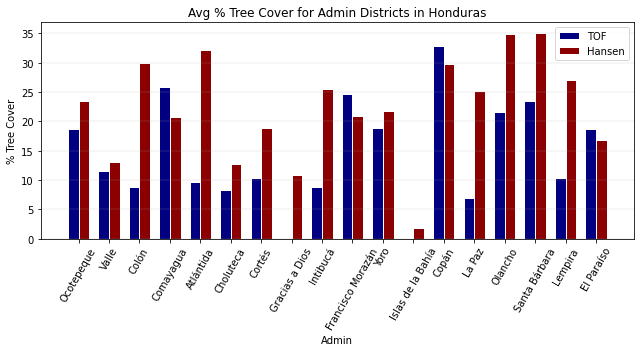

In [115]:
v_groupedbar_mean(hon.tof_mean_tc, 
                  hon.hans_mean_tc, 
                  (9,5), 
                  0.35, 
                  list(hon.admin), 
                  'Avg % Tree Cover for Admin Districts in Honduras')

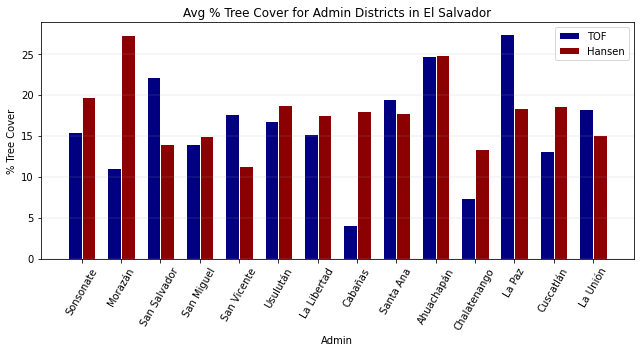

In [100]:
v_groupedbar_mean(es.tof_mean_tc, 
                  es.hans_mean_tc, 
                  (9,5), 
                  0.35, 
                  list(es.admin), 
                  'Avg % Tree Cover for Admin Districts in El Salvador')

In [76]:
es[es.tof_mean_tc > es.hans_mean_tc]

admin  tof_mean_tc  hans_mean_tc  tof_0_20  tof_20_40  tof_40_60  \
2   San Salvador       22.138        14.031    143507      11337      11417   
4    San Vicente       17.600        11.288    198675      16894      14032   
8      Santa Ana       19.445        17.712    286059      18624      20309   
11        La Paz       27.452        18.377    108917      15546      14652   
13      La Unión       18.246        15.035    260827      20136      21714   

    tof_60_80  tof_80_100  hans_0_20  hans_20_40  hans_40_60  hans_60_80  \
2       12937       27676     202684       11241        9016        8998   
4       12092       25453     268307       17926       13626       10790   
8       20865       45833     358503       27875       22042       18075   
11      14164       27331     164063       13029       10045        9151   
13      21033       33272     333066       31965       24272       17610   

    hans_80_100  
2         20389  
4         14694  
8         50458  
11        24365  
13        27712

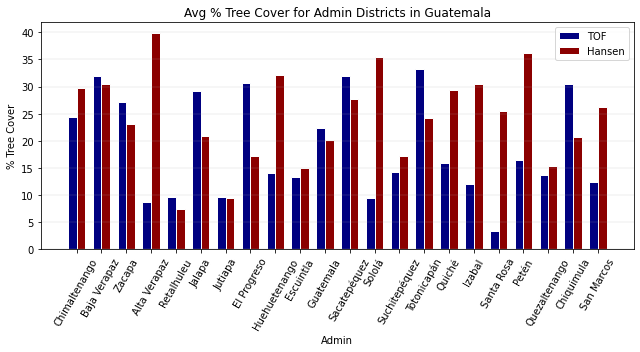

In [62]:
v_groupedbar_mean(gua.tof_mean_tc, 
                  gua.hans_mean_tc, 
                  (9,5), 
                  0.35, 
                  list(gua.admin), 
                  'Avg % Tree Cover for Admin Districts in Guatemala')

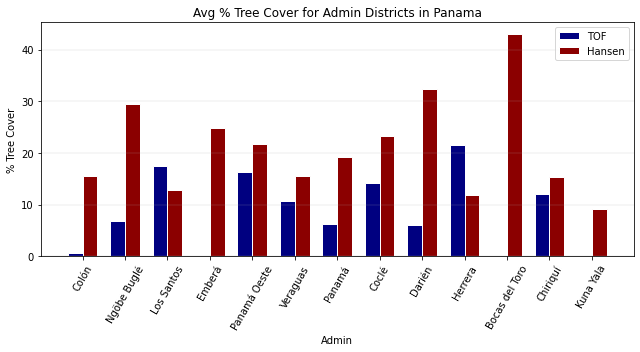

In [41]:
v_groupedbar_mean(pan.tof_mean_tc, 
                  pan.hans_mean_tc, 
                  (9,5), 
                  0.35, 
                  list(pan.admin), 
                  'Avg % Tree Cover for Admin Districts in Panama')

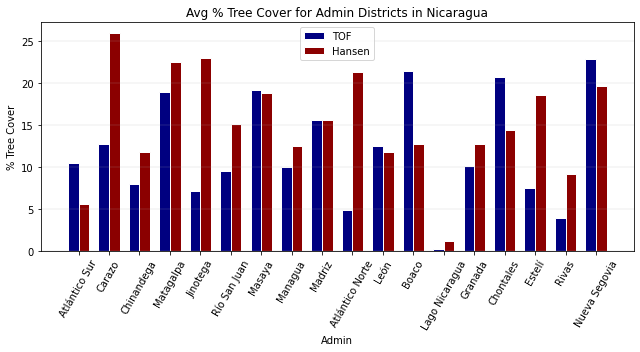

In [49]:
v_groupedbar_mean(nic.tof_mean_tc, 
                  nic.hans_mean_tc, 
                  (9,5), 
                  0.35, 
                  list(nic.admin), 
                  'Avg % Tree Cover for Admin Districts in Nicaragua')

## Compare # ha in the 0-20% tree cover threshold

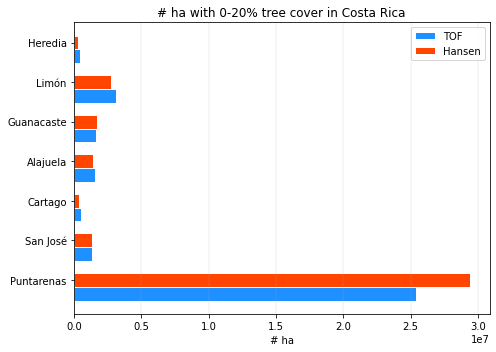

In [34]:
h_groupedbar(cr.tof_0_20, 
             cr.hans_0_20, 
             (7,5), 
             .35, 
             cr.admin, 
             '# of Hectares with 0-20% tree cover in Costa Rica', 
             '# ha')

**Conclusions**  
Looking at the number of hectares that fall in the 0-20% threshold, the TOF and Hansen estimates are pretty similar for six out of seven districts in Costa Rica. The outlier is Puntarenas, where Hansen has a higher estimate.

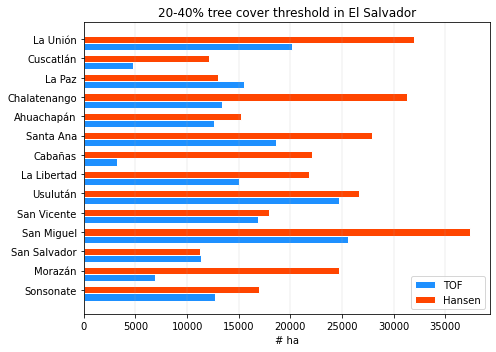

In [79]:
h_groupedbar(es.tof_20_40, 
             es.hans_20_40, 
             (7,5), 
             .37, 
             es.admin, 
             '20-40% tree cover threshold in El Salvador', 
             '# ha')

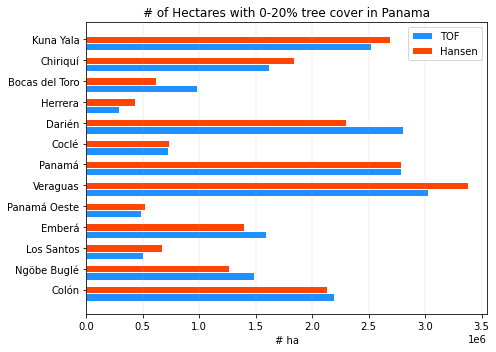

In [38]:
# Panama
h_groupedbar(pan.tof_0_20, 
             pan.hans_0_20, 
             (7,5), 
             .35, 
             pan.admin, 
             '# of Hectares with 0-20% tree cover in Panama', 
             '# ha')

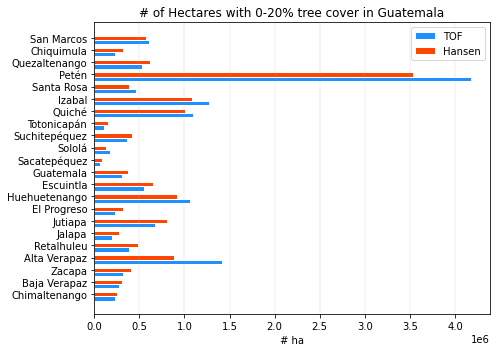

In [63]:
h_groupedbar(gua.tof_0_20, 
             gua.hans_0_20, 
             (7,5), 
             .35, 
             gua.admin, 
             '# of Hectares with 0-20% tree cover in Guatemala', 
             '# ha')

In [117]:
hon[hon.admin == 'Gracias a Dios']

admin  tof_mean_tc  hans_mean_tc  tof_0_20  tof_20_40  tof_40_60  \
7  Gracias a Dios        0.044        10.905   8516172       1981       1266   

   tof_60_80  tof_80_100  hans_0_20  hans_20_40  hans_40_60  hans_60_80  \
7        938        1464    9024282      209170      174966      131539   

   hans_80_100  
7       887679

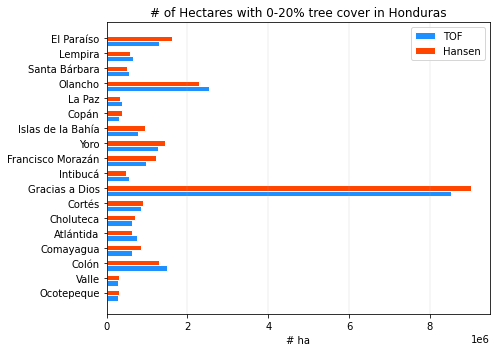

In [116]:
h_groupedbar(hon.tof_0_20, 
             hon.hans_0_20, 
             (7,5), 
             .35, 
             hon.admin, 
             '# of Hectares with 0-20% tree cover in Honduras', 
             '# ha')

## Which cities have the most urban tree cover?

In [108]:
def top_5_cities(data, figsize, barwidth): # data is above or between dataframe
    
    # filter the dataframe to top 5 cities with highest tof avg
    settlement = data[data.ipcc_class == 'Settlement'].sort_values('tof_mean_tc_lc', ascending=False)[:5]
    
    labels = settlement.admin
    x = np.arange(len(labels))  
    width = barwidth  
    
    plt.figure(figsize=figsize)
    plt.bar(x - width/2, settlement.tof_mean_tc_lc, width, label='TOF', color='navy', edgecolor='white')
    plt.bar(x + width/2, settlement.hans_mean_tc_lc, width, label='Hansen', color='darkred', edgecolor='white')

    plt.title('Top 5 Cities with Highest Avg % Tree Cover (TOF)')
    plt.ylabel('% Tree Cover')    
    plt.xticks(x, labels=labels, rotation=60)
    plt.grid(axis='y', linestyle='-', linewidth=.2)
    plt.legend()
    plt.tight_layout()
    
    return None

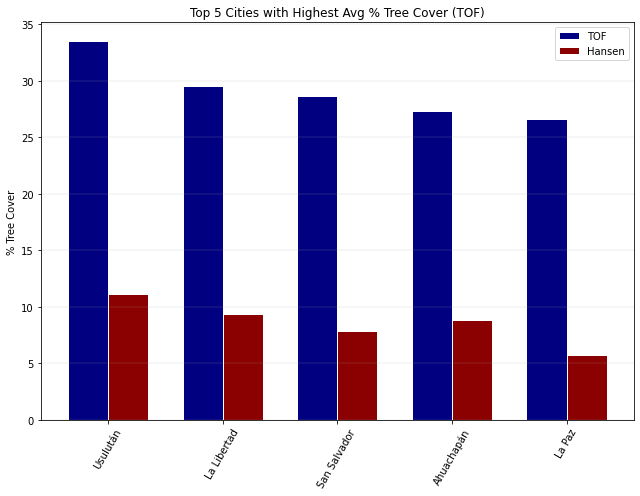

In [110]:
top_5_cities(es_above, (9,7), 0.35)

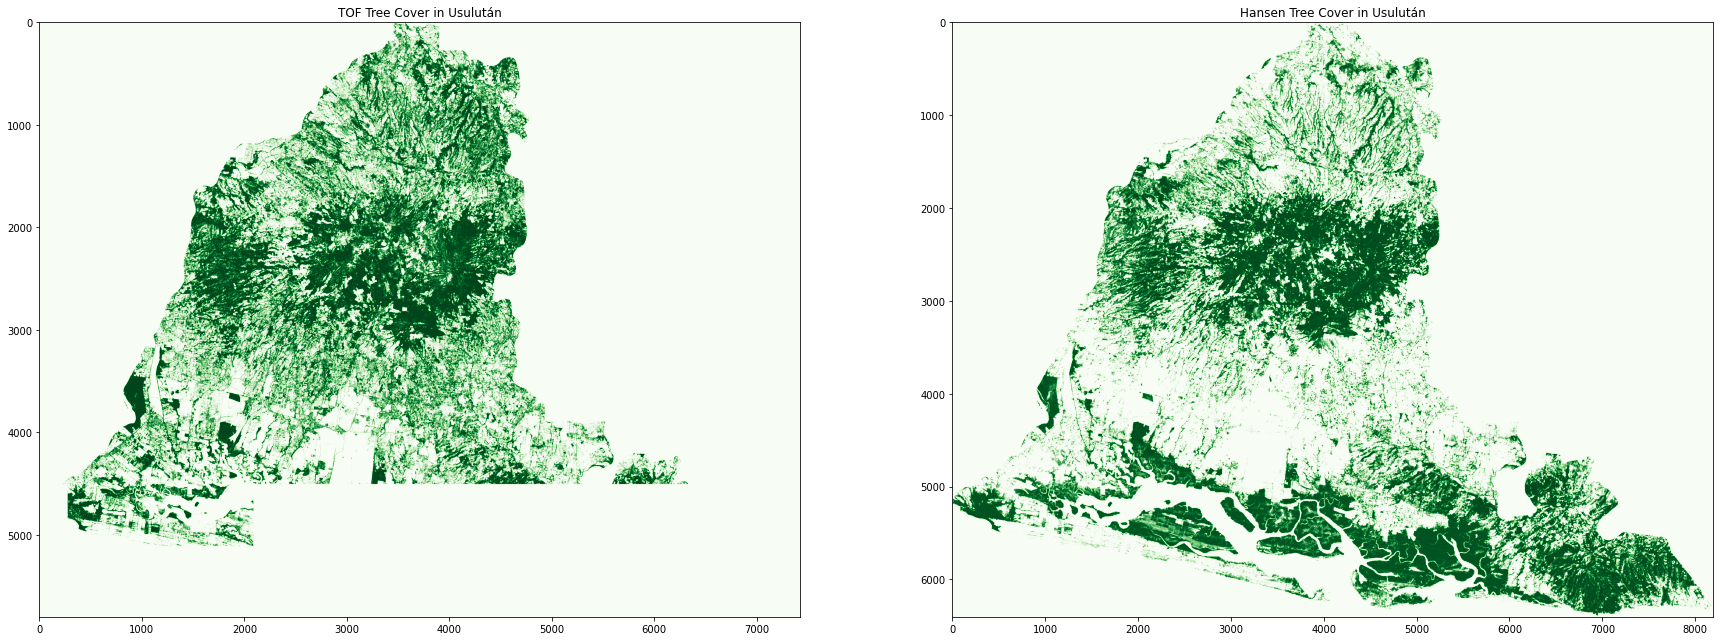

In [112]:
# El Salvador
usulutan_tof = rs.open('El Salvador/resampled_rasters/tof/Usulután.tif').read(1)
usulutan_han = rs.open('El Salvador/resampled_rasters/hansen/Usulután.tif').read(1)

plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.imshow(usulutan_tof, cmap='Greens', vmin=0, vmax=100)
plt.title('TOF Tree Cover in Usulután')

plt.subplot(1,2,2)
plt.imshow(usulutan_han, cmap='Greens', vmin=0, vmax=100)
plt.title('Hansen Tree Cover in Usulután')


plt.tight_layout;

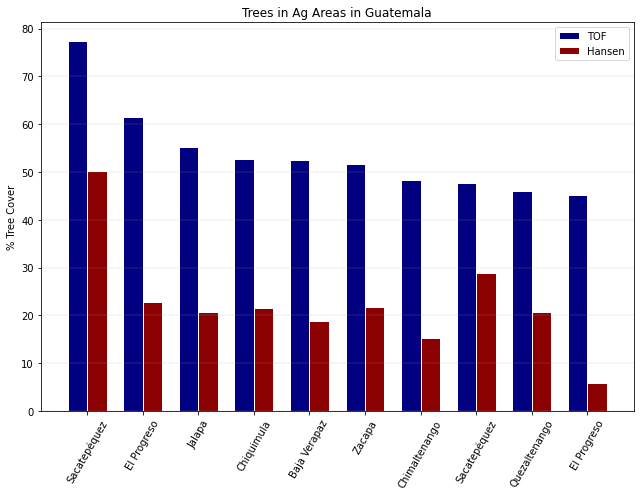

In [18]:
# filter the dataframe to top 5 cities with highest tof avg
ag = gua_above[gua_above.ipcc_class == 'Agriculture'].sort_values('tof_mean_tc_lc', ascending=False)[:10]

labels = ag.admin
x = np.arange(len(labels))  
width = .35  

plt.figure(figsize=(9,7))
plt.bar(x - width/2, ag.tof_mean_tc_lc, width, label='TOF', color='navy', edgecolor='white')
plt.bar(x + width/2, ag.hans_mean_tc_lc, width, label='Hansen', color='darkred', edgecolor='white')

plt.title('Trees in Ag Areas in Guatemala')
plt.ylabel('% Tree Cover')    
plt.xticks(x, labels=labels, rotation=60)
plt.grid(axis='y', linestyle='-', linewidth=.2)
plt.legend()
plt.tight_layout()

# Land Cover

## Define color palettes

In [ ]:
esa_colors = {'No Data': 'black',
              'Cropland, rainfed',
              'Cropland, rainfed, herbaceous cover',
              'Cropland, irrigated or post-flooding',
              'Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover)(<50%)',
              'Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)',
              'Tree cover, broadleaved, evergreen, closed to open (>15%)',
              'Tree cover, broadleaved, deciduous, closed to open (>15%)',
              'Tree cover, needleleaved, evergreen, closed to open (>15%)',
              'Tree cover, needleleaved, deciduous, closed to open (>15%)',
              'Tree cover, mixed leaf type (broadleaved and needleleaved)',
              'Mosaic tree and shrub (>50%) / herbaceous cover (<50%)',
              'Mosaic herbaceous cover (>50%) / tree and shrub (<50%)',
              'Shrubland',
              'Grassland',
              'Lichens and mosses',
              'Sparse vegetation (tree, shrub, herbaceous cover) (<15%)',
              'Tree cover, flooded, fresh or brakish water',
              'Tree cover, flooded, saline water',
              'Shrub or herbaceous cover, flooded, fresh/saline/brakish water',
              'Urban areas',
              'Bare areas',
              'Water bodies',
              'Permanent snow and ice'}

In [ ]:
ipcc_colors = {'Other':'royalblue',
               'Agriculture':'sandybrown',
               'Forest':'green',
               'Grassland':'limegreen',
               'Wetland':'mediumturquoise',
               'Settlement':'palevioletred'}

# our_colors

In [22]:
colors = ['royalblue','maroon', 'gray', 'sandybrown', 
          'gold', 'limegreen', 'green', 'palevioletred',
          'mediumturquoise', 'red', 'cyan', 'sienna', 'navy', 
          'mediumpurple', 'darkkhaki', 'magenta']

In [11]:
# create dataframes for each category of lc class

tree_cover_class = landcover[landcover.esa_id.isin([50, 60, 70, 80, 90, 160, 170])]
mosaic_class = landcover[landcover.esa_id.isin([30, 40, 100, 110])]
crop_urban_class = landcover[landcover.esa_id.isin([10, 11, 20, 190])]
herb_shrub_class = landcover[landcover.esa_id.isin([120, 130, 140, 150, 180, 200])]
other_class = landcover[landcover.esa_id.isin([0, 210, 220])]

### Land Cover Class Breakdown (country scale)
What are the most popular land cover classes in a specific country?

In [50]:
def lcc_country_countplot(country, data, figsize):
    
    '''
    Plots a seaborn countplot of the number of pixels that fall into each land cover class. 
    First plot is for ESA, second is for IPCC. 
    '''
    
    plt.figure(figsize=figsize)

    # plot ESA class counta
    ax1 = plt.subplot(2,1,1)
    sns.countplot(y='esa_class',
              data=data,
              palette='Greens_r',
              order=data.esa_class.value_counts().index,
              ax=ax1)
    ax1.set_title(f'ESA Land Cover Classes in {country}')
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel(' ');
    
    
    # plot IPCC class count
    ax2 = plt.subplot(2,1,2)
    sns.countplot(y='ipcc_class',
                  data=data,
                  palette='Greens_r',
                  order=data.ipcc_class.value_counts().index,
                  ax=ax2)
    ax2.set_title(f'IPCC Land Cover Classes in {country}')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel(' ')
    
    plt.tight_layout;
    
    return None

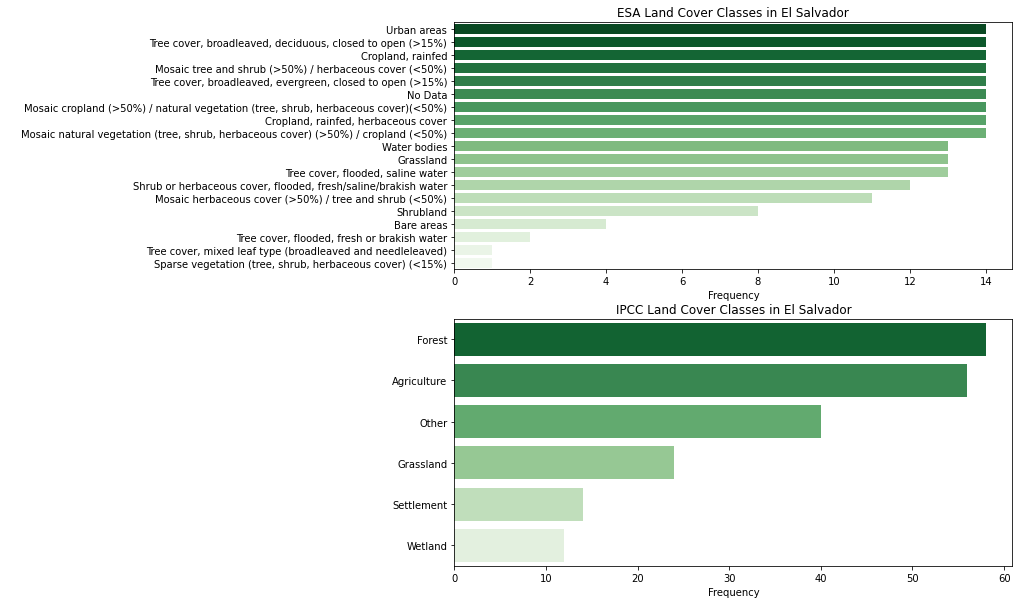

In [55]:
lcc_country_countplot('El Salvador', es_above, (10,10))

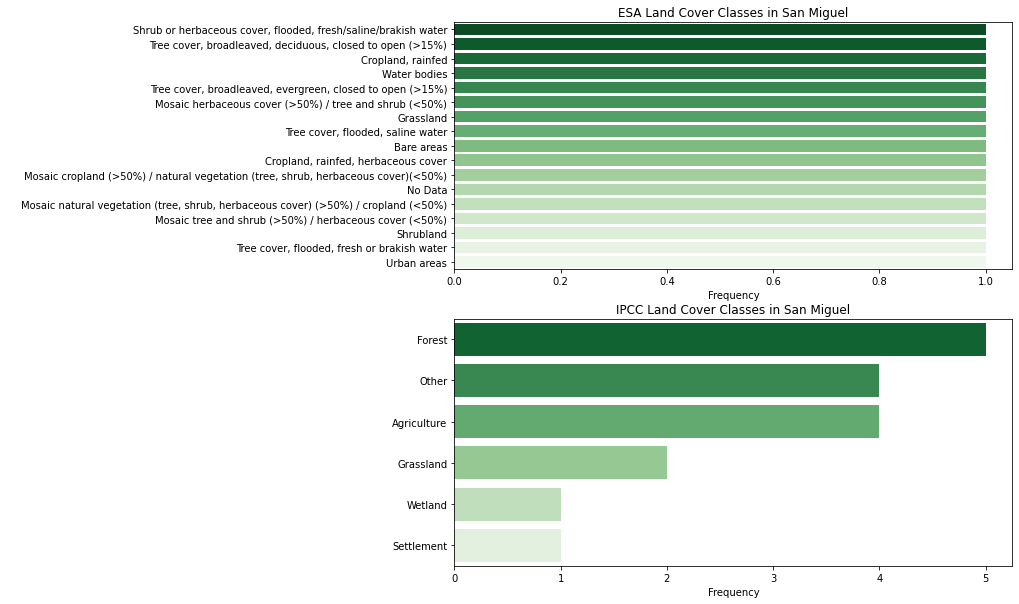

In [56]:
lcc_country_countplot('San Miguel', san_mig, (10,10))

In [53]:
san_mig = es_above[es_above.admin == 'San Miguel']

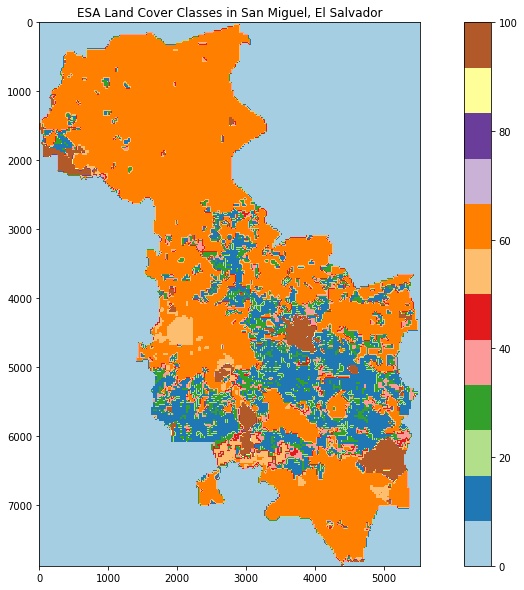

In [75]:
plt.figure(figsize=(16,10))
san_mig_esa = rs.open('El Salvador/resampled_rasters/esa/San Miguel.tif').read(1)
#opico = landcover[landcover.jurisdiction == 'Opico']

plt.imshow(san_mig_esa, cmap='Paired', vmin=0, vmax=100)
plt.title('ESA Land Cover Classes in San Miguel, El Salvador')
plt.colorbar();
# cbar.set_ticks([san_mig.esa_id])
# cbar.set_ticklabels([san_mig.esa_class]);

In [ ]:
lcc_country_countplot('El Salvador', es_above, (10,10))

### Tree Cover per Land Cover Class

Compare TOF and Hansen tree cover estimates for each ESA and IPCC land cover class. 
- What do the above thresholds look like for tree cover per IPCC class?
- Which land cover classes have the highest mean tree cover according to TOF and Hansen? 
- Which have the highest number of hectares? 

In [5]:
def ipcc_means(above_data, figsize, country):
    
    ipcc_means = above_data[['tof_mean_tc_lc', 
                             'hans_mean_tc_lc', 
                             'ipcc_class']].groupby('ipcc_class').mean().reset_index()
    
    ipcc_means = ipcc_means[(ipcc_means.ipcc_class != 'Wetland') & (ipcc_means.ipcc_class != 'Grassland')]
     
    plt.figure(figsize=figsize)
    width = 0.4
    pos1 = np.arange(len(ipcc_means))
    pos2 = pos1 + width

    plt.subplot(2,2,1)
    plt.barh(pos1, ipcc_means['tof_mean_tc_lc'], width, color='sandybrown', edgecolor='white', label='TOF')
    plt.barh(pos2, ipcc_means['hans_mean_tc_lc'], width, color='mediumpurple', edgecolor='white', label='Hansen')

    plt.xlabel('% Tree Cover')
    plt.yticks(pos1 + width / 2, ipcc_means['ipcc_class'].values)

    plt.legend()
    plt.title(f'Mean % Tree Cover per IPCC Land Cover Class in {country}')
    plt.grid(axis='x', linestyle='-', linewidth=.3)

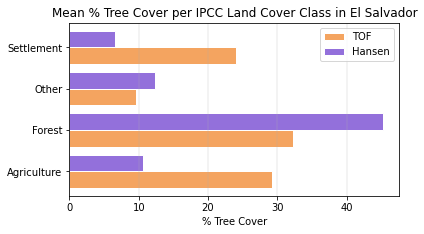

In [6]:
ipcc_means(es_above, (13,7), 'El Salvador')

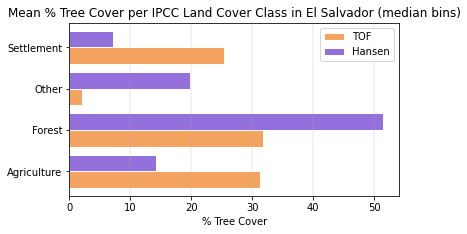

In [7]:
ipcc_means(es_above_new, (13,7), 'El Salvador (median bins)')

In [8]:
plt.figure(figsize=(13,7))

width = 0.4
pos1 = np.arange(len(nic_ipcc_means))
pos2 = pos1 + width

# Honduras
plt.subplot(2,2,1)
plt.barh(pos1, hon_ipcc_means['tof_mean_tc_lc'], width, color='sandybrown', edgecolor='white', label='TOF')
plt.barh(pos2, hon_ipcc_means['hans_mean_tc_lc'], width, color='mediumpurple', edgecolor='white', label='Hansen')
 
plt.xlabel('% Tree Cover')
plt.yticks(pos1 + width / 2, hon_ipcc_means['ipcc_class'].values)

plt.legend()
plt.title('Mean % Tree Cover per IPCC Land Cover Class in Honduras')
plt.grid(axis='x', linestyle='-', linewidth=.3)

# Nicaragua
plt.subplot(2,2,2)
plt.barh(pos1, nic_ipcc_means['tof_mean_tc_lc'], width, color='sandybrown', edgecolor='white', label='TOF')
plt.barh(pos2, nic_ipcc_means['hans_mean_tc_lc'], width, color='mediumpurple', edgecolor='white', label='Hansen')
 
plt.xlabel('% Tree Cover')
plt.yticks(pos1 + width / 2, nic_ipcc_means['ipcc_class'].values)

plt.legend()
plt.title('Mean % Tree Cover per IPCC Land Cover Class in Nicaragua')
plt.grid(axis='x', linestyle='-', linewidth=.3)


# Guatemala
plt.subplot(2,2,3)
plt.barh(pos1, gua_ipcc_means['tof_mean_tc_lc'], width, color='sandybrown', edgecolor='white', label='TOF')
plt.barh(pos2, gua_ipcc_means['hans_mean_tc_lc'], width, color='mediumpurple', edgecolor='white', label='Hansen')
 
plt.xlabel('% Tree Cover')
plt.yticks(pos1 + width / 2, gua_ipcc_means['ipcc_class'].values)

plt.legend()
plt.title('Mean % Tree Cover per IPCC Land Cover Class in Guatemala')
plt.grid(axis='x', linestyle='-', linewidth=.3)

# Panama
plt.subplot(2,2,4)
plt.barh(pos1, pan_ipcc_means['tof_mean_tc_lc'], width, color='sandybrown', edgecolor='white', label='TOF')
plt.barh(pos2, pan_ipcc_means['hans_mean_tc_lc'], width, color='mediumpurple', edgecolor='white', label='Hansen')
 
plt.xlabel('% Tree Cover')
plt.yticks(pos1 + width / 2, pan_ipcc_means['ipcc_class'].values)

plt.legend()
plt.title('Mean % Tree Cover per IPCC Land Cover Class in Panama')
plt.grid(axis='x', linestyle='-', linewidth=.3)
plt.tight_layout()

NameError: name 'nic_ipcc_means' is not defined

<Figure size 936x504 with 0 Axes>

In [ ]:
# illustrate the breakdown of canopy cover % within a land cover class
# for ex: how much cover in different thresholds of the Ag class

In [11]:
# Does Hansen overestimate tree cover at the 10% threshold?
# Seems like a no - TOF sees more hectares of trees at the 10% + threshold
es_ipcc_sums[['ipcc_class','tof_10+', 'hans_10+']]

ipcc_class    tof_10+   hans_10+
0  Agriculture   48482.27   22278.89
1       Forest  208164.90  167572.28
2    Grassland     168.07      70.58
3        Other   19006.46   13782.49
4   Settlement    7377.80    1910.95
5      Wetland      89.55      40.31

In [19]:
es_above_tof = es_above.drop(columns=[col for col in es_above.columns if col.startswith('hans')] + ['esa_id','tof_mean_tc_lc'])
es_above_tof = es_above_tof.groupby('ipcc_class').sum().T.reset_index()
es_above_tof

ipcc_class    index  Agriculture     Forest  Grassland     Other  Settlement  \
0           tof_10+     48482.27  208164.90     168.07  19006.46     7377.80   
1           tof_20+     47870.30  207291.82     164.48  18891.32     7256.09   
2           tof_30+     42741.95  199589.27     138.18  17917.68     6252.34   
3           tof_40+     38618.04  192879.90     117.68  17089.95     5473.57   
4           tof_50+     34929.42  186390.34     100.41  16316.23     4800.50   
5           tof_60+     31297.45  179578.87      84.67  15517.03     4166.03   
6           tof_70+     27428.76  171739.65      69.65  14629.64     3520.40   
7           tof_80+     22787.32  161374.97      53.53  13493.22     2787.44   
8           tof_90+     15837.15  142648.56      34.69  11567.38     1796.13   

ipcc_class  Wetland  
0             89.55  
1             88.46  
2             79.78  
3             73.83  
4             68.03  
5             63.11  
6             58.00  
7             51.96  
8             41.80

In [20]:
es_above_hans = es_above.drop(columns=[col for col in es_above.columns if col.startswith('tof')] + ['esa_id','hans_mean_tc_lc'])
es_above_hans = es_above_hans.groupby('ipcc_class').sum().T.reset_index()
es_above_hans

ipcc_class     index  Agriculture     Forest  Grassland     Other  Settlement  \
0           hans_10+     22278.89  167572.28      70.58  13782.49     1910.95   
1           hans_20+     21220.90  165428.30      62.93  13555.82     1820.49   
2           hans_30+     18583.50  160131.15      51.79  13010.80     1584.32   
3           hans_40+     16662.64  155644.11      34.95  12587.34     1396.35   
4           hans_50+     11714.53  142271.42      23.97  11361.79     1060.74   
5           hans_60+      7136.66  126656.47      12.83  10032.05      764.78   
6           hans_70+      5601.10  120775.65      11.24   9524.44      692.56   
7           hans_80+      3706.14  111264.78       8.63   8629.99      573.99   
8           hans_90+      2326.14   94586.65       5.81   7133.75      436.83   

ipcc_class  Wetland  
0             40.31  
1             36.18  
2             30.70  
3             20.71  
4             15.37  
5             10.86  
6              8.45  
7              5.96  
8              2.13

### Above IPCC Thresholds

In [33]:
def above_thresholds_ipcc(data): # takes in the country_above dataframe
    
    plt.figure(figsize=(15,12))

    # prepare the dataframes: groupby IPCC class, sum the total ha
    above_tof = data.drop(columns=[col for col in data.columns if col.startswith('hans')] + ['esa_id','tof_mean_tc_lc'])
    above_tof = above_tof.groupby('ipcc_class').sum().T.reset_index()
    
    above_hans = data.drop(columns=[col for col in data.columns if col.startswith('tof')] + ['esa_id','hans_mean_tc_lc'])
    above_hans = above_hans.groupby('ipcc_class').sum().T.reset_index()

    # format bars
    width = 0.4
    pos1 = np.arange(len(above_tof))
    pos2 = pos1 + width
    labels = ['>10%', '>20%', '>30%', '>40%', '>50%','>60%', '>70%', '>80%', '>90%']

    # Forest
    plt.subplot(2,2,1)
    plt.barh(pos1, above_tof['Forest'], width, color='dodgerblue', edgecolor='white', label='TOF')
    plt.barh(pos2, above_hans['Forest'], width, color='darkred', edgecolor='white', label='Hansen')

    plt.xlabel('Number of Hectares')
    plt.yticks(pos1 + width / 2, labels)
    plt.title('Tree Cover Thresholds for IPCC Forest Class')
    plt.grid(axis='x', linestyle='-', linewidth=.3)

    # Other
    plt.subplot(2,2,2)
    plt.barh(pos1, above_tof['Other'], width, color='dodgerblue', edgecolor='white', label='TOF')
    plt.barh(pos2, above_hans['Other'], width, color='darkred', edgecolor='white', label='Hansen')

    plt.xlabel('Number of Hectares')
    plt.yticks(pos1 + width / 2, labels)
    plt.title('Tree Cover Thresholds for IPCC Other Class')
    plt.grid(axis='x', linestyle='-', linewidth=.3)

    # Settlement
    plt.subplot(2,2,3)
    plt.barh(pos1, above_tof['Settlement'], width, color='dodgerblue', edgecolor='white', label='TOF')
    plt.barh(pos2, above_hans['Settlement'], width, color='darkred', edgecolor='white', label='Hansen')

    plt.xlabel('Number of Hectares')
    plt.yticks(pos1 + width / 2, labels)
    plt.title('Tree Cover Thresholds for IPCC Settlement Class')
    plt.grid(axis='x', linestyle='-', linewidth=.3)

    # Agriculture
    plt.subplot(2,2,4)
    plt.barh(pos1, above_tof['Agriculture'], width, color='dodgerblue', edgecolor='white', label='TOF')
    plt.barh(pos2, above_hans['Agriculture'], width, color='darkred', edgecolor='white', label='Hansen')

    plt.xlabel('Number of Hectares')
    plt.yticks(pos1 + width / 2, labels)
    plt.title('Tree Cover Thresholds for IPCC Agriculture Class')
    plt.grid(axis='x', linestyle='-', linewidth=.3)
    plt.legend();
    
    return None

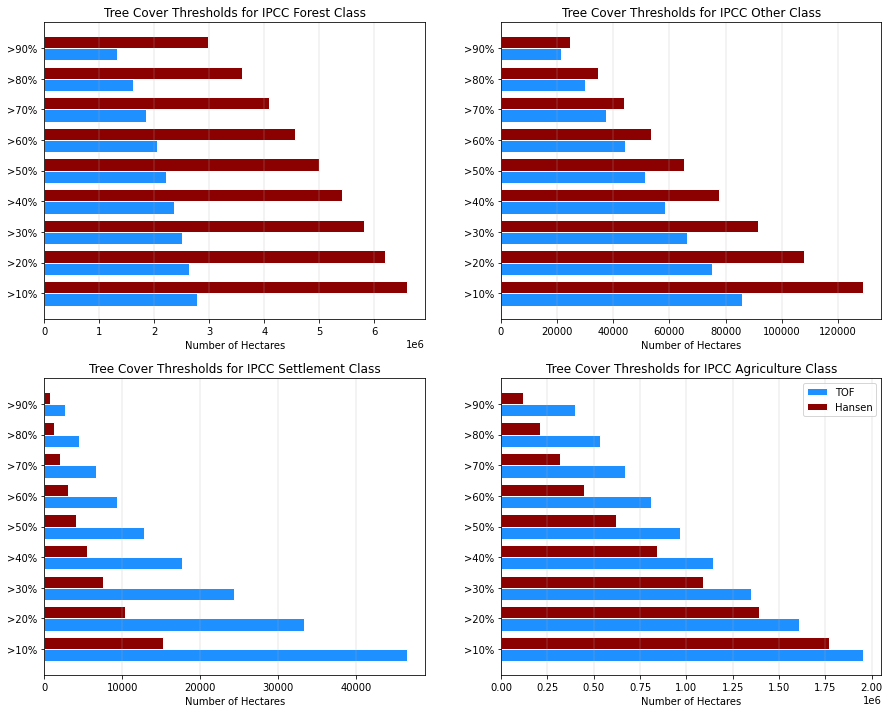

In [72]:
above_thresholds_ipcc(gua_above)

These charts illustrate the total number of hectares of tree cover over 10% increments for Hansen and TOF data. Total hectares are aggregated by IPCC land cover type across all the admin districts in a country. Specifically, this section looks at the comparisons by Forest, Agriculture, Other and Settlement IPCC land cover classes (not pictured: Grassland and Wetland).

In [52]:
# sum num hectares in each threshold to see totals by IPCC class for Costa Rica
cr_ipcc_sums = cr_above.drop(columns=['esa_id', 'tof_mean_tc_lc', 'hans_mean_tc_lc']).groupby('ipcc_class').sum().reset_index()
cr_ipcc_sums

ipcc_class    tof_10+    tof_20+    tof_30+    tof_40+    tof_50+  \
0  Agriculture  443209.44  429510.43  429463.09  370622.77  370576.08   
1       Forest  482529.53  474624.17  474602.56  439028.44  439003.23   
2    Grassland    2676.66    2551.09    2551.09    2049.88    2049.88   
3        Other   21538.44   21047.25   21047.25   18920.79   18920.79   
4   Settlement   10275.63    9583.18    9583.18    7028.00    7028.00   
5      Wetland     239.42     227.25     227.25     177.94     177.94   

     tof_60+    tof_70+    tof_80+    tof_90+    hans_10+    hans_20+  \
0  319295.94  319230.49  219066.55  218787.34   709241.77   673000.43   
1  405035.31  404993.64  327332.53  327087.78  3118512.37  3083964.67   
2    1661.10    1661.10     996.89     996.89     6774.97     6605.56   
3   16949.04   16949.04   12686.85   12686.85    84281.36    82907.82   
4    5081.46    5081.46    2155.00    2155.00     5155.52     4971.27   
5     142.70     142.70      83.68      83.68      635.88      602.22   

     hans_30+    hans_40+    hans_50+    hans_60+    hans_70+    hans_80+  \
0   633309.52   595448.29   493684.67   389417.27   352473.34   291572.35   
1  3044819.98  3001278.94  2876690.02  2725609.72  2666220.77  2551369.16   
2     6009.72     5622.12     4484.19     3418.76     3129.35     2386.67   
3    81027.91    79479.37    74127.35    68123.47    65828.02    61910.18   
4     4479.22     4125.63     3078.12     2119.91     1908.33     1489.29   
5      557.25      526.54      430.13      333.65      287.92      242.56   

     hans_90+  
0   194435.24  
1  2279381.23  
2     1283.75  
3    52656.88  
4      899.73  
5      178.31

In [53]:
cr_above_tof = cr_above.drop(columns=[col for col in cr_above.columns if col.startswith('hans')] + ['esa_id','tof_mean_tc_lc'])
cr_above_tof = cr_above_tof.groupby('ipcc_class').sum().T.reset_index()

In [54]:
cr_above_hans = cr_above.drop(columns=[col for col in cr_above.columns if col.startswith('tof')] + ['esa_id','hans_mean_tc_lc'])
cr_above_hans = cr_above_hans.groupby('ipcc_class').sum().T.reset_index()

In [55]:
cr_above_tof

ipcc_class    index  Agriculture     Forest  Grassland     Other  Settlement  \
0           tof_10+    443209.44  482529.53    2676.66  21538.44    10275.63   
1           tof_20+    429510.43  474624.17    2551.09  21047.25     9583.18   
2           tof_30+    429463.09  474602.56    2551.09  21047.25     9583.18   
3           tof_40+    370622.77  439028.44    2049.88  18920.79     7028.00   
4           tof_50+    370576.08  439003.23    2049.88  18920.79     7028.00   
5           tof_60+    319295.94  405035.31    1661.10  16949.04     5081.46   
6           tof_70+    319230.49  404993.64    1661.10  16949.04     5081.46   
7           tof_80+    219066.55  327332.53     996.89  12686.85     2155.00   
8           tof_90+    218787.34  327087.78     996.89  12686.85     2155.00   

ipcc_class  Wetland  
0            239.42  
1            227.25  
2            227.25  
3            177.94  
4            177.94  
5            142.70  
6            142.70  
7             83.68  
8             83.68

In [56]:
cr_above_hans

ipcc_class     index  Agriculture      Forest  Grassland     Other  \
0           hans_10+    709241.77  3118512.37    6774.97  84281.36   
1           hans_20+    673000.43  3083964.67    6605.56  82907.82   
2           hans_30+    633309.52  3044819.98    6009.72  81027.91   
3           hans_40+    595448.29  3001278.94    5622.12  79479.37   
4           hans_50+    493684.67  2876690.02    4484.19  74127.35   
5           hans_60+    389417.27  2725609.72    3418.76  68123.47   
6           hans_70+    352473.34  2666220.77    3129.35  65828.02   
7           hans_80+    291572.35  2551369.16    2386.67  61910.18   
8           hans_90+    194435.24  2279381.23    1283.75  52656.88   

ipcc_class  Settlement  Wetland  
0              5155.52   635.88  
1              4971.27   602.22  
2              4479.22   557.25  
3              4125.63   526.54  
4              3078.12   430.13  
5              2119.91   333.65  
6              1908.33   287.92  
7              1489.29   242.56  
8               899.73   178.31

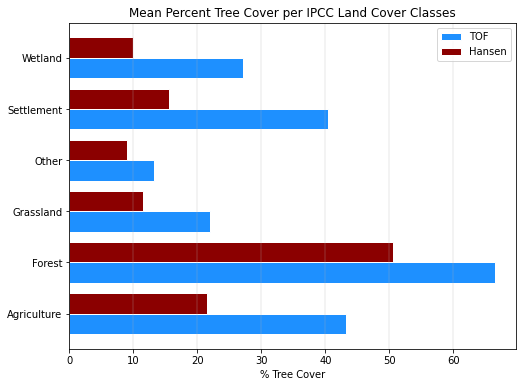

In [126]:
mean_per_ipcc = landcover[['tof_mean_tc', 
                           'hansen_mean_tc', 
                           'ipcc_class']].groupby('ipcc_class').mean().reset_index()
plt.figure(figsize=(8,6))

width = 0.4
pos1 = np.arange(len(mean_per_ipcc))
pos2 = pos1 + width

plt.barh(pos1, mean_per_ipcc['tof_mean_tc'], width, color='dodgerblue', edgecolor='white', label='TOF')
plt.barh(pos2, mean_per_ipcc['hansen_mean_tc'], width, color='darkred', edgecolor='white', label='Hansen')
 
plt.xlabel('% Tree Cover')
plt.yticks(pos1 + width / 2, mean_per_ipcc['ipcc_class'].values)

plt.legend()
plt.title('Mean Percent Tree Cover per IPCC Land Cover Classes')
plt.grid(axis='x', linestyle='-', linewidth=.3);


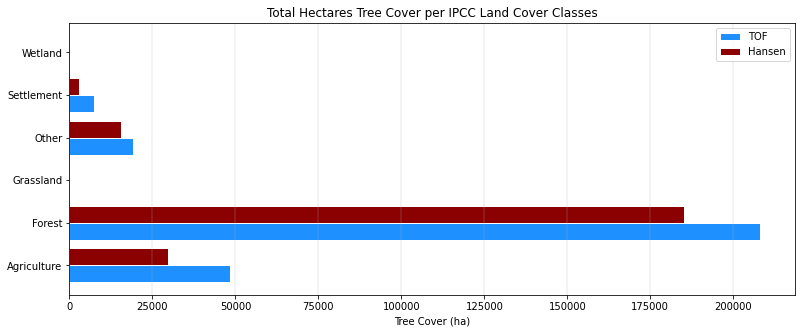

In [132]:
ha_per_ipcc = landcover[['tof_total_ha', 
                        'hansen_total_ha', 
                        'ipcc_class']].groupby('ipcc_class').sum().reset_index()

plt.figure(figsize=(13,5))

width = 0.4
pos1 = np.arange(len(ha_per_ipcc))
pos2 = pos1 + width

plt.barh(pos1, ha_per_ipcc['tof_total_ha'], width, color='dodgerblue', edgecolor='white', label='TOF')
plt.barh(pos2, ha_per_ipcc['hansen_total_ha'], width, color='darkred', edgecolor='white', label='Hansen')
 
plt.xlabel('Tree Cover (ha)')
plt.yticks(pos1 + width / 2, ha_per_ipcc['ipcc_class'].values)

plt.legend()
plt.title('Total Hectares Tree Cover per IPCC Land Cover Classes')
plt.grid(axis='x', linestyle='-', linewidth=.3);


In [121]:
ha_per_lc = landcover[['tof_total_ha', 
                       'hansen_total_ha', 
                       'lc_class']].groupby('lc_class').sum().sort_values('tof_total_ha').reset_index()

mean_per_lc = landcover[['tof_mean_tc', 
                       'hansen_mean_tc', 
                       'lc_class']].groupby('lc_class').mean().sort_values('tof_mean_tc').reset_index()

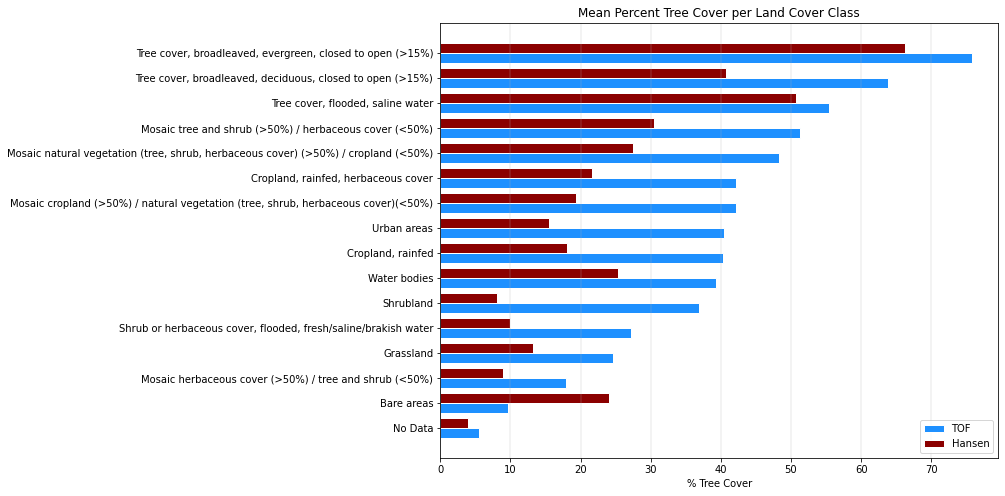

In [122]:
plt.figure(figsize=(10,8))

width = 0.4
pos1 = np.arange(len(mean_per_lc))
pos2 = pos1 + width

plt.barh(pos1, mean_per_lc['tof_mean_tc'], width, color='dodgerblue', edgecolor='white', label='TOF')
plt.barh(pos2, mean_per_lc['hansen_mean_tc'], width, color='darkred', edgecolor='white', label='Hansen')
 
plt.xlabel('% Tree Cover')
plt.yticks(pos1 + width / 2, mean_per_lc['lc_class'].values)

plt.legend()
plt.title('Mean Percent Tree Cover per Land Cover Class')
plt.grid(axis='x', linestyle='-', linewidth=.3);

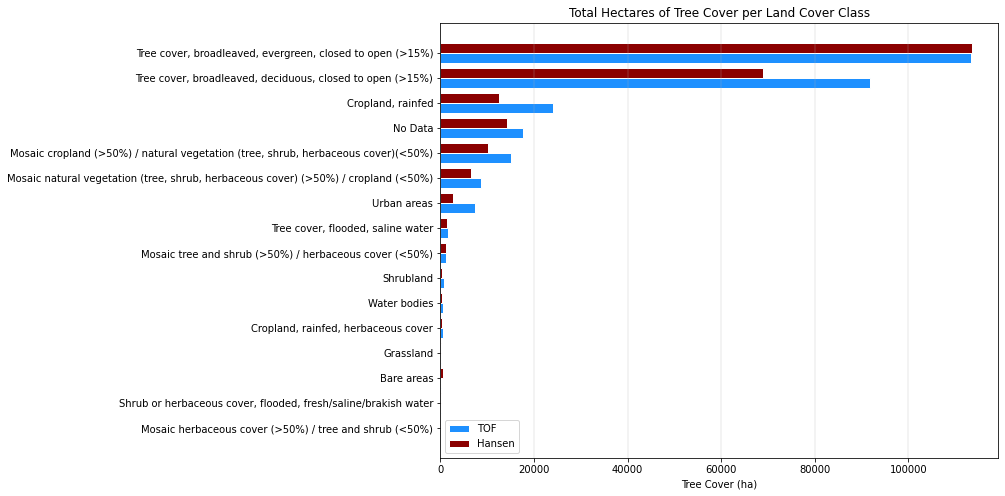

In [123]:
plt.figure(figsize=(10,8))

width = 0.4
 
# Set position of bar on X axis
pos1 = np.arange(len(ha_per_lc))
pos2 = pos1 + width

plt.barh(pos1, ha_per_lc['tof_total_ha'], width, color='dodgerblue', edgecolor='white', label='TOF')
plt.barh(pos2, ha_per_lc['hansen_total_ha'], width, color='darkred', edgecolor='white', label='Hansen')
 
# Add xticks on the middle of the group bars
plt.xlabel('Tree Cover (ha)')
plt.yticks(pos1 + width / 2, ha_per_lc['lc_class'].values)
 
# Create legend & Show graphic
plt.legend()
plt.title('Total Hectares of Tree Cover per Land Cover Class')
plt.grid(axis='x', linestyle='-', linewidth=.3);

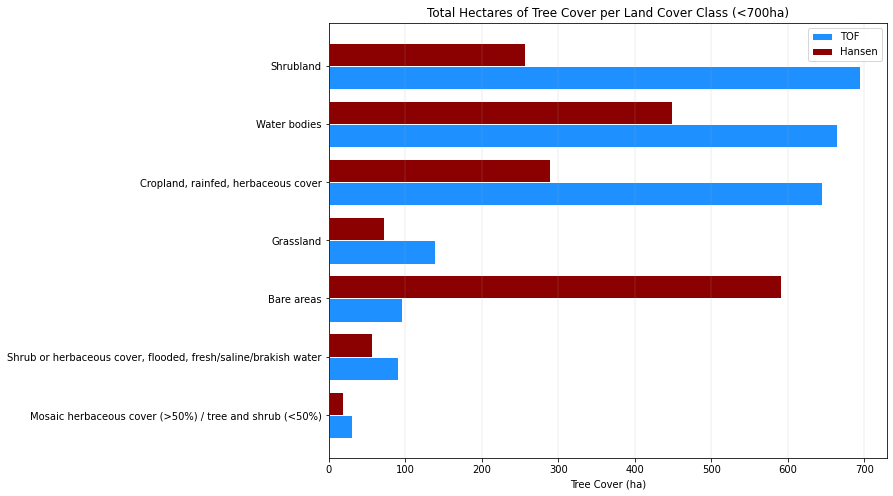

In [124]:
# zoom in on land categories with smaller count

plt.figure(figsize=(10,8))

width = 0.4
 
# Set position of bar on X axis
pos1 = np.arange(0,7)
pos2 = pos1 + width

plt.barh(pos1, ha_per_lc['tof_total_ha'][:7], width, color='dodgerblue', edgecolor='white', label='TOF')
plt.barh(pos2, ha_per_lc['hansen_total_ha'][:7], width, color='darkred', edgecolor='white', label='Hansen')
 
# Add xticks on the middle of the group bars
plt.xlabel('Tree Cover (ha)')
plt.yticks(pos1 + width / 2, ha_per_lc['lc_class'].values[:7])
 
# Create legend & Show graphic
plt.legend()
plt.title('Total Hectares of Tree Cover per Land Cover Class (<700ha)')
plt.grid(axis='x', linestyle='-', linewidth=.2);

### Canopy Cover in Agriculture
What is the breakdown of TOF canopy cover estimates in the IPCC Agriculture class?

In [12]:
# filter to ag class
gua_ag = gua_btw[gua_btw.ipcc_class == 'Agriculture']

# drop hansen and esa columns
gua_ag = gua_ag.drop(columns=[col for col in gua_ag.columns if col.startswith('hans')] + ['esa_id','esa_class', 'tof_mean_tc_lc'])

# group by the admin and sum the other columns
gua_ag = gua_ag.groupby(by='admin').sum()

gua_ag

tof_0_20  tof_20_40  tof_40_60  tof_60_80  tof_80_100
admin                                                               
Alta Verapaz     133193      22460      17630      14616       31688
Baja Verapaz       9244       4550       5353       6360       10739
Chimaltenango      2478        386        437        502         942
Chiquimula        21632      11989      13073      14688       19981
El Progreso        5313       3198       3682       4606       10059
Escuintla        237721      33458      17994      10678       11413
Guatemala          7543       2078       1935       2049        2686
Huehuetenango     31075       5638       5787       5896        8000
Izabal           174035      44862      31905      24853       42728
Jalapa            10736       6401       6896       8158       13817
Jutiapa           43036      11246       7039       4569        3952
Petén           1077105     233886     155994     124357      306935
Quezaltenango     23774       6785       5099       4213       11203
Quiché            45047       5476       5345       5367        9083
Retalhuleu       101915      16533      10732       7808       12629
Sacatepéquez        255        136        129        120         429
San Marcos        27998       7014       5294       4185        8432
Santa Rosa        52952       8685       4783       2849        2028
Sololá             2329        109         55         42          50
Suchitepéquez     62177      12861       9052       6758       11249
Totonicapán         587         24         16         15          22
Zacapa            29641      15273      13839      13033       23414

In [13]:
gua_ag.tof_0_20.sum()

2099786

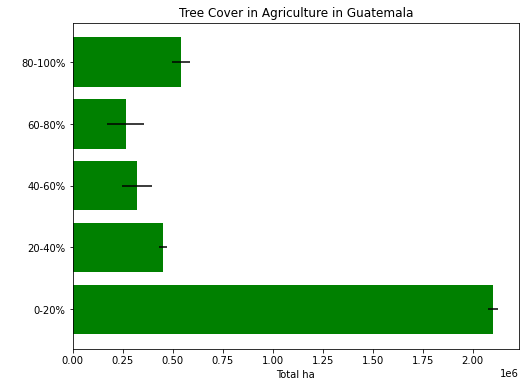

In [28]:
plt.figure(figsize = (8,6))
x = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
totals = [gua_ag.tof_0_20.sum(),
          gua_ag.tof_20_40.sum(),
          gua_ag.tof_40_60.sum(),
          gua_ag.tof_60_80.sum(),
          gua_ag.tof_80_100.sum()]

variance = [25000, 20000, 74000, 92000, 45000]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, totals, color='green', xerr=variance)
plt.ylabel(" ")
plt.xlabel("Total ha")
plt.title("Tree Cover in Agriculture in Guatemala")

plt.yticks(x_pos, x)

plt.show()

### Average and Total Difference per Class
What is the average and total difference between TOF and Hansen tree cover estimates?

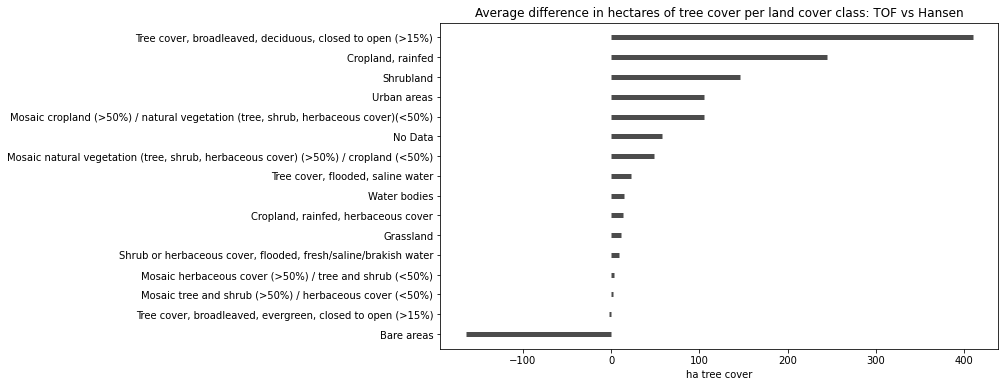

In [18]:
# Plots the average difference between total hecatares of tof and hansen for each land cover class
# the tof_hans column is calculated by tof total ha - hansen total ha

diverge_mean = landcover.groupby('lc_class')['tof_hans'].mean().sort_values().reset_index()
diverge_sum = landcover.groupby('lc_class')['tof_hans'].sum().sort_values().reset_index()
colors = ['red' if x < 0 else 'green' for x in diverge_mean.tof_hans]

plt.figure(figsize=(10,6))

plt.hlines(y=diverge_mean.lc_class, 
           xmin=0, 
           xmax=diverge_mean.tof_hans, 
           alpha=0.7,
           linewidth=5)

plt.title('Average difference in hectares of tree cover per land cover class: TOF vs Hansen')
plt.xlabel('ha tree cover');

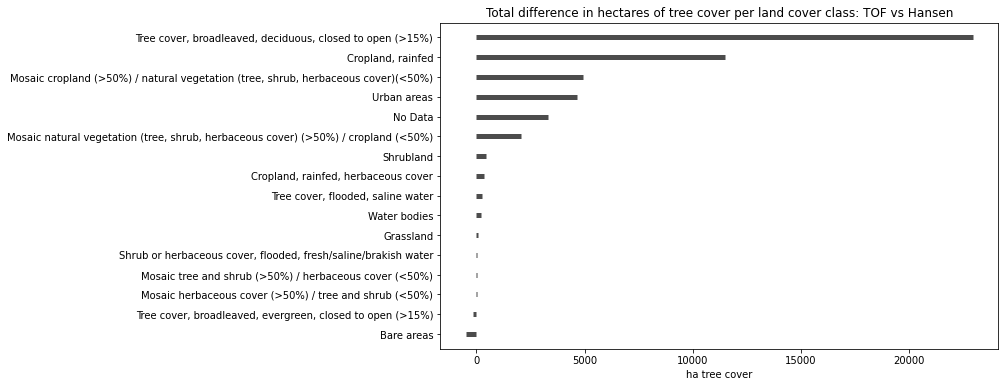

In [19]:
plt.figure(figsize=(10,6))

plt.hlines(y=diverge_sum.lc_class, 
           xmin=0, 
           xmax=diverge_sum.tof_hans, 
           alpha=0.7,
           linewidth=5)

plt.title('Total difference in hectares of tree cover per land cover class: TOF vs Hansen')
plt.xlabel('ha tree cover');

### Total Hectares per Class: Hansen v TOF
What does the distribution look like across all land cover classes?

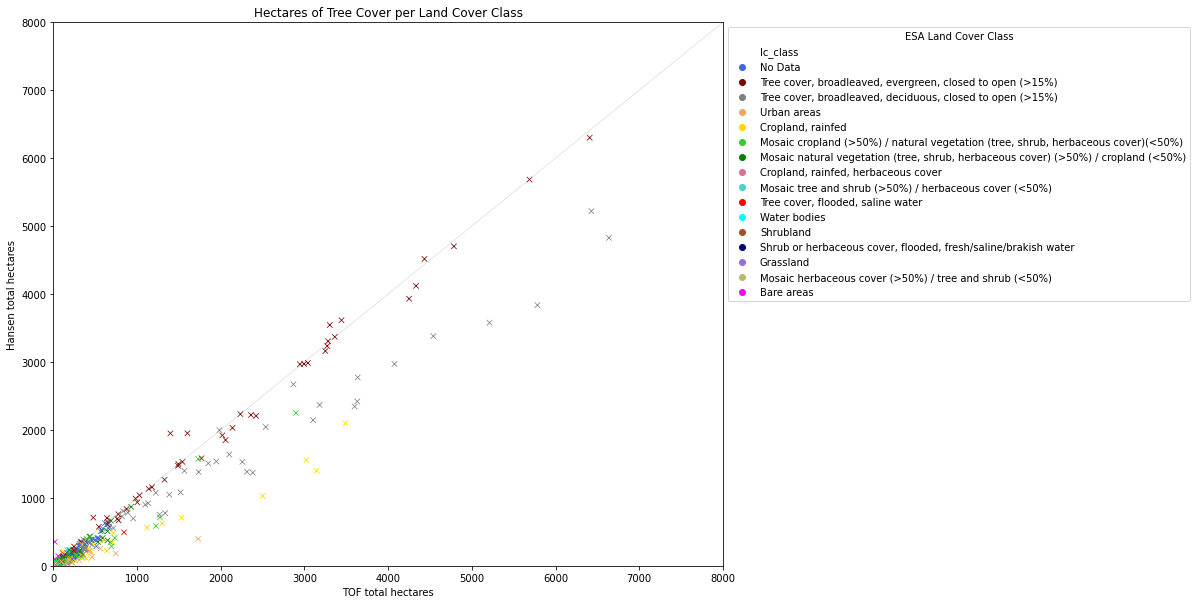

In [138]:
# All land cover classes 
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x='tof_total_ha', 
               y='hansen_total_ha', 
               data=landcover, 
               hue='lc_class',
               marker='x',
               s=30,
               palette=colors,
               ax=ax)
ax.set(xlim=(0, 8000), ylim=(0, 8000))
ax.plot(np.arange(0.001, 8000, 1), color='grey', linewidth=.2)
ax.set_title('Hectares of Tree Cover per Land Cover Class')
ax.set_xlabel('TOF total hectares')
ax.set_ylabel('Hansen total hectares')


plt.legend(bbox_to_anchor=(1.0, 1), title='ESA Land Cover Class');

In [140]:
under500 = landcover[(landcover.tof_total_ha <= 500) & (landcover.hansen_total_ha <= 500)]
under2k = landcover[(landcover.tof_total_ha <= 2000) & (landcover.hansen_total_ha <= 2000)]

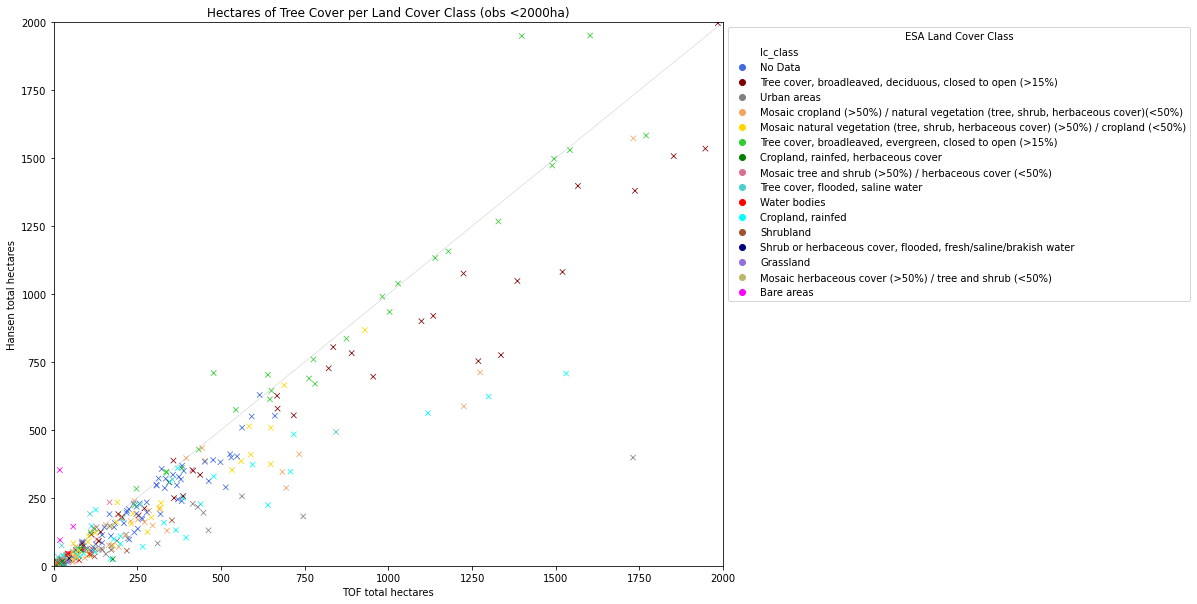

In [141]:
# All land cover classes for obs <2000ha
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x='tof_total_ha', 
               y='hansen_total_ha', 
               data=under2k, 
               hue='lc_class',
               marker='x',
               s=30,
               palette=colors,
               ax=ax)
ax.set(xlim=(0, 2000), ylim=(0, 2000))
ax.plot(np.arange(0.001, 3000, 1), color='grey', linewidth=.2)
ax.set_title('Hectares of Tree Cover per Land Cover Class (obs <2000ha)')
ax.set_xlabel('TOF total hectares')
ax.set_ylabel('Hansen total hectares')


plt.legend(bbox_to_anchor=(1.0, 1), title='ESA Land Cover Class');

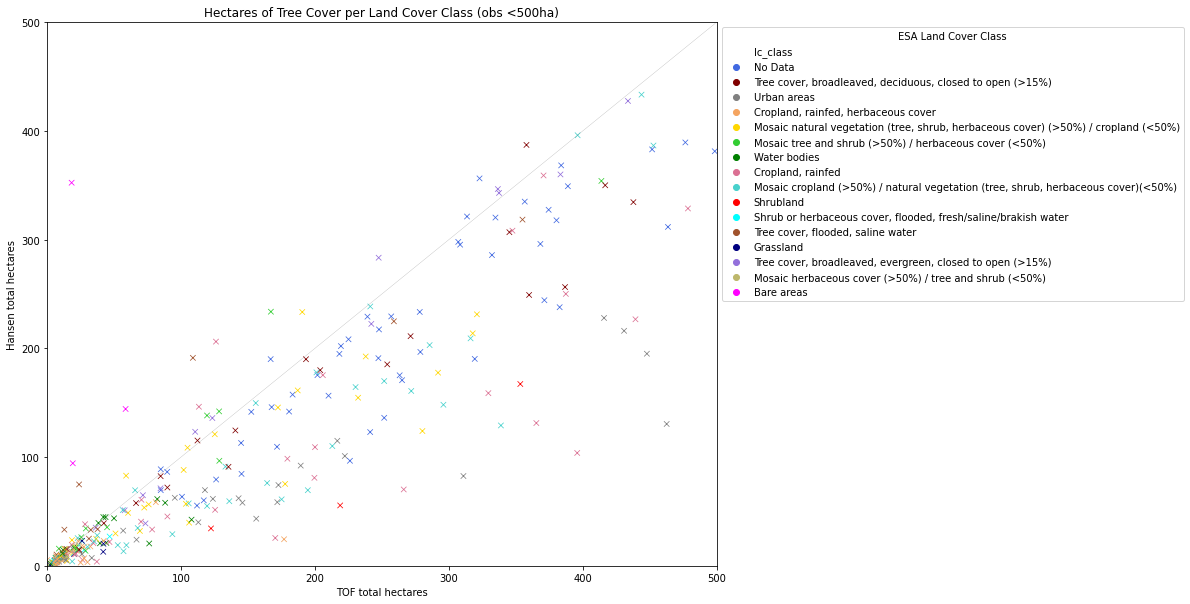

In [142]:
# All land cover classes for obs <500ha
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x='tof_total_ha', 
               y='hansen_total_ha', 
               data=under500, 
               hue='lc_class',
               marker='x',
               s=30,
               palette=colors,
               ax=ax)
ax.set(xlim=(0, 500), ylim=(0, 500))
ax.plot(np.arange(0.001, 500, 1), color='grey', linewidth=.2)
ax.set_title('Hectares of Tree Cover per Land Cover Class (obs <500ha)')
ax.set_xlabel('TOF total hectares')
ax.set_ylabel('Hansen total hectares')

plt.legend(bbox_to_anchor=(1.0, 1), title='ESA Land Cover Class');

In [20]:
es_above.head()

admin  esa_id                                          esa_class  \
0  Sonsonate     0.0                                            No Data   
1  Sonsonate    10.0                                  Cropland, rainfed   
2  Sonsonate    11.0                Cropland, rainfed, herbaceous cover   
3  Sonsonate    30.0  Mosaic cropland (>50%) / natural vegetation (t...   
4  Sonsonate    40.0  Mosaic natural vegetation (tree, shrub, herbac...   

    ipcc_class  tof_mean_tc_lc  hans_mean_tc_lc  tof_10+  tof_20+  tof_30+  \
0        Other        0.402163         0.917798     1156      982      839   
1  Agriculture       34.098194        11.956648    18773    15980    13311   
2  Agriculture       19.890436         5.954967      487      350      264   
3  Agriculture       32.656651        17.065428    13288    11432     9648   
4  Agriculture       40.793636        25.694923     7179     6475     5832   

   tof_40+  ...  tof_90+  hans_10+  hans_20+  hans_30+  hans_40+  hans_50+  \
0      725  ...      250      2219      1920      1726      1557      1385   
1    10865  ...     1516      9449      6732      4687      3109      1951   
2      190  ...       33       146       114        95        76        65   
3     7912  ...     1181      9084      6757      4983      3541      2347   
4     5145  ...     1255      6097      4891      3877      3041      2218   

   hans_60+  hans_70+  hans_80+  hans_90+  
0      1222      1048       868       679  
1      1125       630       321       135  
2        55        45        39        26  
3      1389       753       383       167  
4      1561       980       578       267  

[5 rows x 24 columns]

In [80]:
forest

admin  esa_id                                          esa_class  \
5       Sonsonate    50.0  Tree cover, broadleaved, evergreen, closed to ...   
6       Sonsonate    60.0  Tree cover, broadleaved, deciduous, closed to ...   
7       Sonsonate   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
10      Sonsonate   170.0                  Tree cover, flooded, saline water   
20        Morazán    50.0  Tree cover, broadleaved, evergreen, closed to ...   
21        Morazán    60.0  Tree cover, broadleaved, deciduous, closed to ...   
22        Morazán   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
32   San Salvador    50.0  Tree cover, broadleaved, evergreen, closed to ...   
33   San Salvador    60.0  Tree cover, broadleaved, deciduous, closed to ...   
34   San Salvador   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
38   San Salvador   170.0                  Tree cover, flooded, saline water   
46     San Miguel    50.0  Tree cover, broadleaved, evergreen, closed to ...   
47     San Miguel    60.0  Tree cover, broadleaved, deciduous, closed to ...   
48     San Miguel   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
52     San Miguel   160.0        Tree cover, flooded, fresh or brakish water   
53     San Miguel   170.0                  Tree cover, flooded, saline water   
63    San Vicente    50.0  Tree cover, broadleaved, evergreen, closed to ...   
64    San Vicente    60.0  Tree cover, broadleaved, deciduous, closed to ...   
65    San Vicente    90.0  Tree cover, mixed leaf type (broadleaved and n...   
66    San Vicente   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
68    San Vicente   170.0                  Tree cover, flooded, saline water   
77       Usulután    50.0  Tree cover, broadleaved, evergreen, closed to ...   
78       Usulután    60.0  Tree cover, broadleaved, deciduous, closed to ...   
79       Usulután   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
82       Usulután   160.0        Tree cover, flooded, fresh or brakish water   
83       Usulután   170.0                  Tree cover, flooded, saline water   
92    La Libertad    50.0  Tree cover, broadleaved, evergreen, closed to ...   
93    La Libertad    60.0  Tree cover, broadleaved, deciduous, closed to ...   
94    La Libertad   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
98    La Libertad   170.0                  Tree cover, flooded, saline water   
108       Cabañas    50.0  Tree cover, broadleaved, evergreen, closed to ...   
109       Cabañas    60.0  Tree cover, broadleaved, deciduous, closed to ...   
110       Cabañas   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
111       Cabañas   170.0                  Tree cover, flooded, saline water   
120     Santa Ana    50.0  Tree cover, broadleaved, evergreen, closed to ...   
121     Santa Ana    60.0  Tree cover, broadleaved, deciduous, closed to ...   
122     Santa Ana   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
126     Santa Ana   170.0                  Tree cover, flooded, saline water   
135    Ahuachapán    50.0  Tree cover, broadleaved, evergreen, closed to ...   
136    Ahuachapán    60.0  Tree cover, broadleaved, deciduous, closed to ...   
137    Ahuachapán   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
141    Ahuachapán   170.0                  Tree cover, flooded, saline water   
150  Chalatenango    50.0  Tree cover, broadleaved, evergreen, closed to ...   
151  Chalatenango    60.0  Tree cover, broadleaved, deciduous, closed to ...   
152  Chalatenango   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
156  Chalatenango   170.0                  Tree cover, flooded, saline water   
166        La Paz    50.0  Tree cover, broadleaved, evergreen, closed to ...   
167        La Paz    60.0  Tree cover, broadleaved, deciduous, closed to ...   
168        La Paz   100.0  Mosaic tree and shrub (>50%) / herbaceous cove...   
171        L

In [95]:
other['hans_10+'].max()

5758

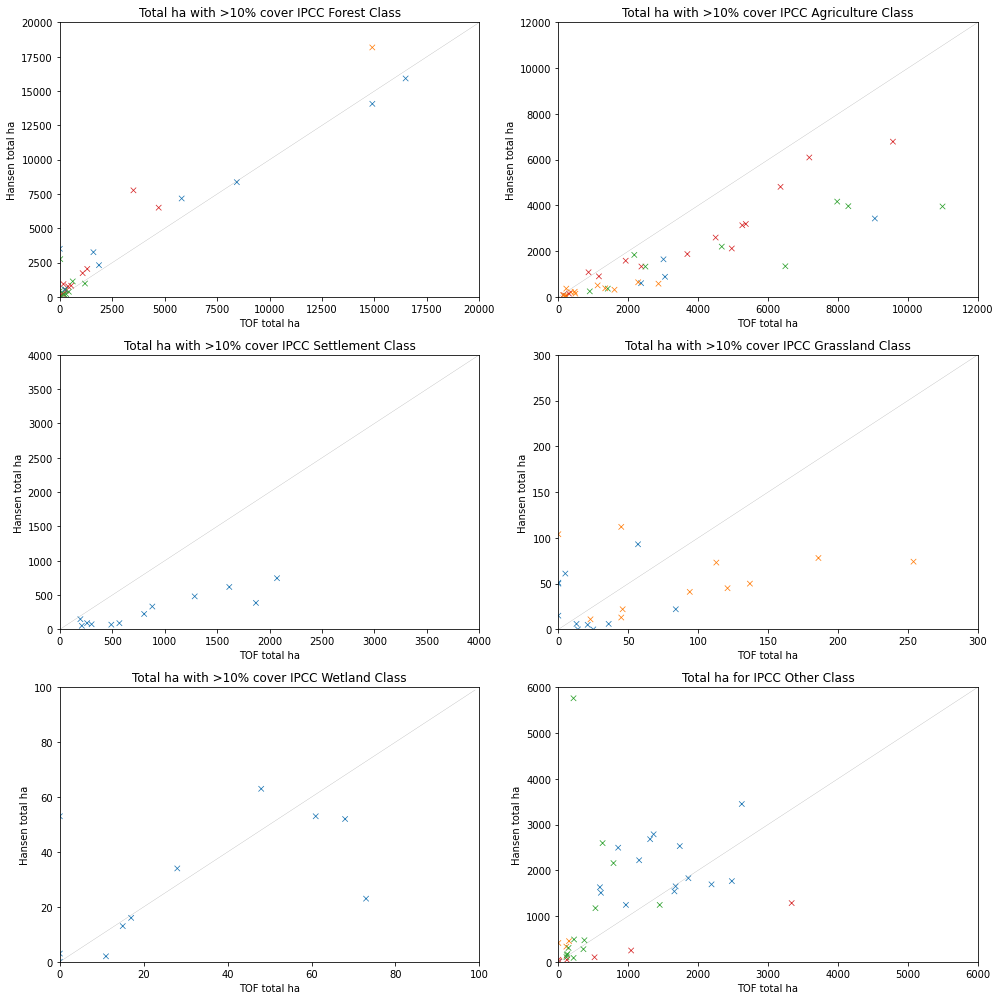

In [96]:
# El Salvador: total ha >10% cover per IPCC class

forest = es_above[es_above.ipcc_class == 'Forest']
agriculture = es_above[es_above.ipcc_class == 'Agriculture']
settlement = es_above[es_above.ipcc_class == 'Settlement']
grassland = es_above[es_above.ipcc_class == 'Grassland']
wetland = es_above[es_above.ipcc_class == 'Wetland']
other = es_above[es_above.ipcc_class == 'Other']

plt.figure(figsize=(14,14))

ax1 = plt.subplot(3,2,1)
sns.scatterplot(x='tof_10+', 
               y='hans_10+', 
               data=forest, 
               hue='esa_class',
               marker='x',
               s=30,
               #palette=colors[:5],
               ax=ax1,
               legend=False)
ax1.set(xlim=(0, 20000), ylim=(0, 20000))
ax1.plot(np.arange(0.001, 20000, 1), color='grey', linewidth=.2)
ax1.set_title('Total ha with >10% cover IPCC Forest Class')
ax1.set_xlabel('TOF total ha')
ax1.set_ylabel('Hansen total ha')

ax2 = plt.subplot(3,2,2)
sns.scatterplot(x='tof_10+', 
               y='hans_10+', 
               data=agriculture, 
               hue='esa_class',
               marker='x',
               s=30,
               #palette=colors[4:8],
               ax=ax2,
               legend=False)
ax2.set(xlim=(0, 12000), ylim=(0, 12000))
ax2.plot(np.arange(0.001, 12000, 1), color='grey', linewidth=.2)
ax2.set_title('Total ha with >10% cover IPCC Agriculture Class')
ax2.set_xlabel('TOF total ha')
ax2.set_ylabel('Hansen total ha')


ax3 = plt.subplot(3,2,3)
sns.scatterplot(x='tof_10+', 
               y='hans_10+', 
               data=settlement, 
               hue='esa_class',
               marker='x',
               s=30,
               #palette=colors[8:9],
               ax=ax3,
               legend=False)
ax3.set(xlim=(0, 4000), ylim=(0, 4000))
ax3.plot(np.arange(0.001, 4000, 1), color='grey', linewidth=.2)
ax3.set_title('Total ha with >10% cover IPCC Settlement Class')
ax3.set_xlabel('TOF total ha')
ax3.set_ylabel('Hansen total ha')

ax4 = plt.subplot(3,2,4)
sns.scatterplot(x='tof_10+', 
               y='hans_10+', 
               data=grassland, 
               hue='esa_class',
               marker='x',
               s=30,
               #palette=colors[9:11],
               ax=ax4,
               legend=False)
ax4.set(xlim=(0, 300), ylim=(0, 300))
ax4.plot(np.arange(0.001, 1000, 1), color='grey', linewidth=.2)
ax4.set_title('Total ha with >10% cover IPCC Grassland Class')
ax4.set_xlabel('TOF total ha')
ax4.set_ylabel('Hansen total ha')

ax5 = plt.subplot(3,2,5)
sns.scatterplot(x='tof_10+', 
               y='hans_10+', 
               data=wetland, 
               hue='esa_class',
               marker='x',
               s=30,
               #palette=colors[11:12],
               ax=ax5,
               legend=False)
ax5.set(xlim=(0, 100), ylim=(0, 100))
ax5.plot(np.arange(0.001, 100, 1), color='grey', linewidth=.2)
ax5.set_title('Total ha with >10% cover IPCC Wetland Class')
ax5.set_xlabel('TOF total ha')
ax5.set_ylabel('Hansen total ha')

ax6 = plt.subplot(3,2,6)
sns.scatterplot(x='tof_10+', 
               y='hans_10+', 
               data=other, 
               hue='esa_class',
               marker='x',
               s=30,
               #palette=colors[12:],
               ax=ax6,
               legend=False)
ax6.set(xlim=(0, 6000), ylim=(0, 6000))
ax6.plot(np.arange(0.001, 6000, 1), color='grey', linewidth=.2)
ax6.set_title('Total ha for IPCC Other Class')
ax6.set_xlabel('TOF total ha')
ax6.set_ylabel('Hansen total ha')

# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
plt.tight_layout();


In [33]:
plt.figure(figsize=(16,10))
opico_esa = rs.open('El Salvador/clipped_rasters/esa/Opico.tif').read(1)
opico = landcover[landcover.jurisdiction == 'Opico']


ax1 = plt.subplot(1,2,1)

width = 0.4
pos1 = np.arange(len(opico))
pos2 = pos1 + width

ax1.barh(pos1, opico['tof_mean_tc'], width, color='dodgerblue', edgecolor='white', label='TOF')
ax1.barh(pos2, opico['hansen_mean_tc'], width, color='darkred', edgecolor='white', label='Hansen')
 
plt.xlabel('% Tree Cover')
plt.yticks(pos1 + width / 2, opico['lc_class'].values)

plt.legend()
ax1.set_title('Mean Percent Tree Cover per Land Cover Class in Opico')
plt.grid(axis='x', linestyle='-', linewidth=.3)

ax2 = plt.subplot(1,2,2)
ax2.imshow(opico_esa, cmap='Paired', vmin=0, vmax=100)
ax2.set_title('Land Cover Classes in Opico');


RasterioIOError: El Salvador/clipped_rasters/esa/Opico.tif: No such file or directory

<Figure size 1152x720 with 0 Axes>

# Old Visuals

In [ ]:
# for adding data bar labels
for p, label ain zip(ax.patches, cr_above.esa_class.value_counts(ascending=False)):
    x = p.get_x() + p.get_width() + 0.7
    y = p.get_y() + p.get_height()/2
    ax.annotate(label, (x,y), ha='center', va='top')

### Tree Cover in No Data Class
What does tree cover look like in ESA's "No Data" class?

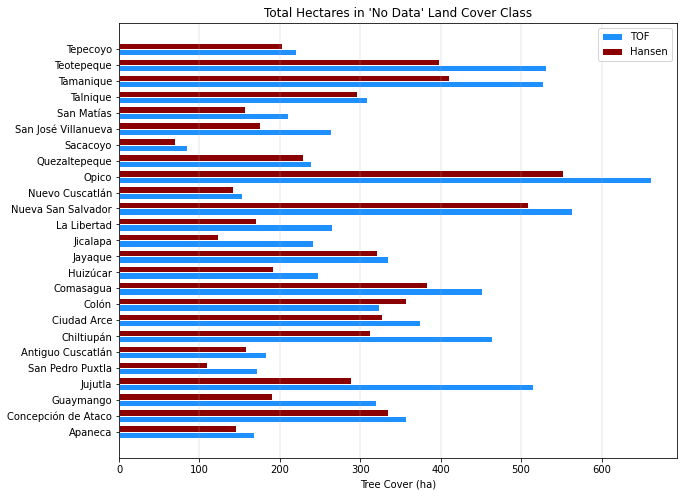

In [181]:
no_data25 = landcover[landcover.lc_class == 'No Data'][:25]

plt.figure(figsize=(10,8))
width = 0.4
 
# Set position of bar on X axis
pos1 = np.arange(len(no_data25))
pos2 = pos1 + width

plt.barh(pos1, no_data25['tof_total_ha'], width, color='dodgerblue', edgecolor='white', label='TOF')
plt.barh(pos2, no_data25['hansen_total_ha'], width, color='darkred', edgecolor='white', label='Hansen')
 
# Add xticks on the middle of the group bars
plt.xlabel('Tree Cover (ha)')
plt.yticks(pos1 + width / 2, no_data25['jurisdiction'].values)
 
# Create legend & Show graphic
plt.legend()
plt.title("Total Hectares in 'No Data' Land Cover Class")
plt.grid(axis='x', linestyle='-', linewidth=.3);

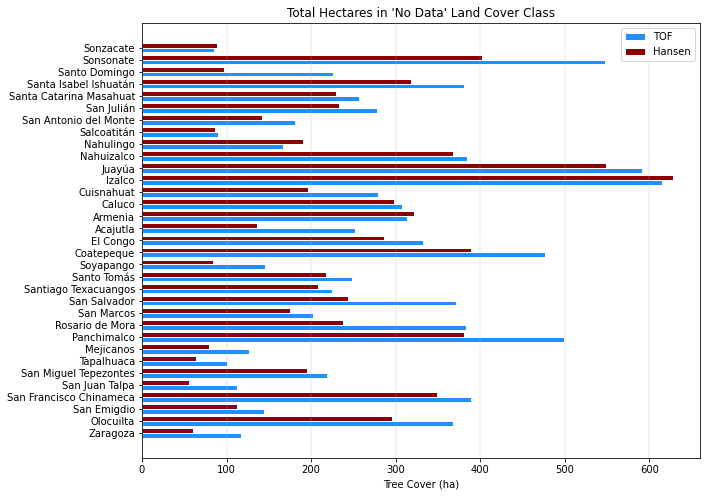

In [187]:
no_data33 = landcover[landcover.lc_class == 'No Data'][25:]

plt.figure(figsize=(10,8))
width = 0.4
 
# Set position of bar on X axis
pos1 = np.arange(len(no_data33))
pos2 = pos1 + width

plt.barh(pos1, no_data33['tof_total_ha'], width, color='dodgerblue', edgecolor='white', label='TOF')
plt.barh(pos2, no_data33['hansen_total_ha'], width, color='darkred', edgecolor='white', label='Hansen')
 
# Add xticks on the middle of the group bars
plt.xlabel('Tree Cover (ha)')
plt.yticks(pos1 + width / 2, no_data33['jurisdiction'].values)
 
# Create legend & Show graphic
plt.legend()
plt.title("Total Hectares in 'No Data' Land Cover Class")
plt.grid(axis='x', linestyle='-', linewidth=.3);